In [2]:
import scipy
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [30]:
data = np.load("all_features.npy")

data = data[:, :, :, 2:6]

labels_ids = [[1,2,3,0,2,0,0,1,0,1,2,1,1,1,2,3,2,2,3,3,0,3,0,3],
        [2,1,3,0,0,2,0,2,3,3,2,3,2,0,1,1,2,1,0,3,0,1,3,1],
        [1,2,2,1,3,3,3,1,1,2,1,0,2,3,3,0,2,3,0,0,2,0,1,0]]
print(len(labels_ids))
labels = np.zeros(data.shape[:-3])
for session in range(data.shape[0]):
    for video in range(data.shape[2]):
        labels[session,:,video] = labels_ids[session][video]

print(labels.shape) # (3, 15, 24, 8)
print(data.shape) # (3, 15, 24, 8, 4, 62, 10)
print(np.logical_or((labels == 0), (labels == 2)).shape) # (3, 15, 24, 8)


3
(3, 15, 24, 4)
(3, 15, 24, 4, 4, 62, 10)
(3, 15, 24, 4)


In [31]:
def train_test(features, labels, test_subjects=[0,1,2]):
    test_data = features[:, test_subjects]
    test_labels = labels[:, test_subjects]

    train_data = np.delete(features, test_subjects, axis=1)
    train_labels = np.delete(labels, test_subjects, axis=1)

    return train_data, train_labels, test_data, test_labels

In [48]:

accs = []
for i in range(15):
    train_data, train_labels, test_data, test_labels = train_test(data, labels, test_subjects=[i])

    train_mask = np.logical_or((train_labels == 0), (train_labels == 2))
    test_mask = np.logical_or((test_labels == 0), (test_labels == 2))

    train_labels = train_labels[train_mask]
    train_data = train_data[train_mask]

    test_labels = test_labels[test_mask]
    test_data = test_data[test_mask]

    test_data = np.reshape(test_data, (test_data.shape[0], -1))
    train_data = np.reshape(train_data, (train_data.shape[0], -1))

    train_labels[train_labels == 0] = 0
    test_labels[test_labels == 0] = 0

    test_labels[test_labels == 2] = 1
    train_labels[train_labels == 2] = 1

    # print(train_data.shape)
    # print(train_labels.shape)

    # print(test_data.shape)
    # print(test_labels.shape)
    knn = KNeighborsClassifier(n_neighbors=100, metric='euclidean')
    knn.fit(train_data,train_labels)
    predicted_data = knn.predict(test_data)
    acc = accuracy_score(test_labels,predicted_data)
    print(f"i {i}, acc {acc}")
# normalize data
# train_data = (train_data - np.mean(train_data, axis=0)) / np.std(train_data, axis=0)
# test_data = (test_data - np.mean(train_data, axis=0)) / np.std(train_data, axis=0)



i 0, acc 0.5
i 1, acc 0.5347222222222222
i 2, acc 0.4722222222222222
i 3, acc 0.5833333333333334
i 4, acc 0.5
i 5, acc 0.5277777777777778
i 6, acc 0.4791666666666667
i 7, acc 0.4583333333333333
i 8, acc 0.5138888888888888
i 9, acc 0.5069444444444444
i 10, acc 0.5208333333333334
i 11, acc 0.5
i 12, acc 0.4305555555555556
i 13, acc 0.4791666666666667
i 14, acc 0.5833333333333334


In [49]:
train_data, train_labels, test_data, test_labels = train_test(data, labels, test_subjects=[i])

train_mask = np.logical_or((train_labels == 0), (train_labels == 2))
test_mask = np.logical_or((test_labels == 0), (test_labels == 2))

train_labels = train_labels[train_mask]
train_data = train_data[train_mask]

test_labels = test_labels[test_mask]
test_data = test_data[test_mask]

test_data = np.reshape(test_data, (test_data.shape[0], -1))
train_data = np.reshape(train_data, (train_data.shape[0], -1))

train_labels[train_labels == 0] = 0
test_labels[test_labels == 0] = 0

test_labels[test_labels == 2] = 1
train_labels[train_labels == 2] = 1

In [47]:
# KORELACIONA ANALIZA SA LABELAMA
df1 = pd.DataFrame(train_data)
df2 = pd.DataFrame(test_data)
df = pd.concat([df1, df2])
df1['label'] = np.concatenate([train_labels])
df2['label'] = np.concatenate([test_labels])

df['label'] = np.concatenate((train_labels, test_labels))
# save df to csv
df.to_csv('data.csv', index=False)

df2.to_csv('test_data.csv', index=False)
df1.to_csv('train_data.csv', index=False)

# df
# corr_analysis=abs(df.corr()['label']).sort_values(ascending=False)
# corr_analysis = corr_analysis[corr_analysis.index!='label']
# corr_analysis


In [41]:
print(f"Shapes: {train_data.shape}, {train_labels.shape}, {test_data.shape}, {test_labels.shape}")

Shapes: (1728, 2480), (1728,), (432, 2480), (432,)


In [42]:
knn = KNeighborsClassifier(n_neighbors=100, metric='euclidean')
knn.fit(train_data,train_labels)
predicted_data = knn.predict(test_data)
acc = accuracy_score(test_labels,predicted_data)
acc

0.5208333333333334

In [43]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train_data, train_labels)
predicted_data = clf.predict(test_data)
acc = accuracy_score(test_labels,predicted_data)
acc

0.4976851851851852

In [44]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=10)
pca.fit(train_data)
train_data_pca = pca.transform(train_data)
test_data_pca = pca.transform(test_data)

knn = KNeighborsClassifier(n_neighbors=100, metric='euclidean')
knn.fit(train_data_pca,train_labels)
predicted_data = knn.predict(test_data_pca)
acc = accuracy_score(test_labels,predicted_data)
acc

0.48842592592592593

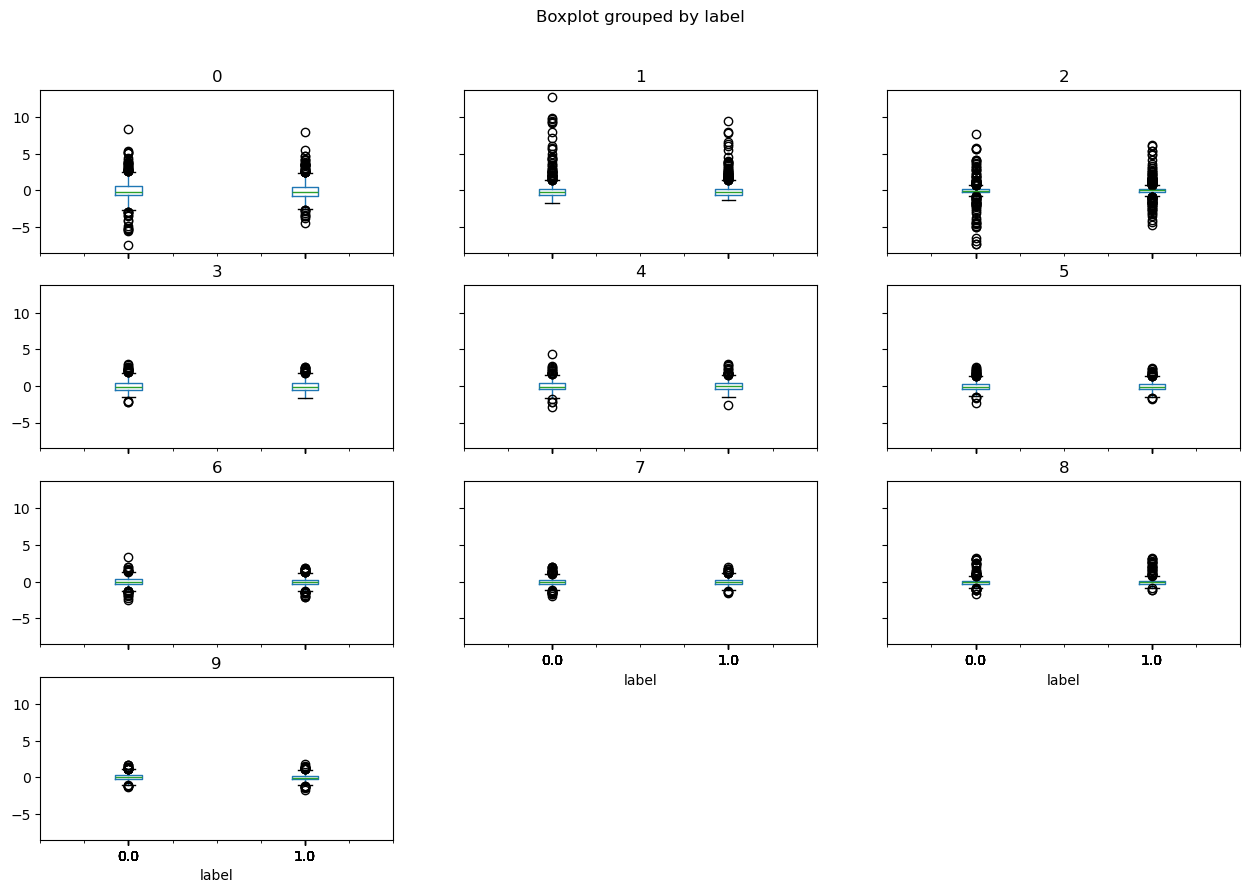

In [45]:
# create box plots for pca components for each class
# box plots 
df = pd.DataFrame(train_data_pca)
df['label'] = train_labels
df.boxplot(by='label', column=[0,1,2,3,4,5,6,7,8,9], grid=False, figsize=(15,10))
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

print(torch.cuda.is_available())
# clear cuda cache
torch.cuda.empty_cache()

In [ ]:
hidden_size = 500
net = nn.Sequential(
    nn.Linear(10*62*4, hidden_size),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(hidden_size, 4),
    nn.Sigmoid()
).to('cuda')

optimizer = torch.optim.Adam(net.parameters(), lr=0.00001)
loss_fn = nn.CrossEntropyLoss()

train_data = torch.tensor(train_data, dtype=torch.float32).to('cuda')
train_labels = torch.tensor(train_labels, dtype=torch.long).to('cuda')
test_data = torch.tensor(test_data, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)
# convert labels to one-hot encoding
train_labels = F.one_hot(train_labels, num_classes=4).float()
test_labels = F.one_hot(test_labels, num_classes=4).float()



In [ ]:
net.train()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)
net.apply(init_weights)
for epoch in range(100000):
    # clear cuda cache
    torch.cuda.empty_cache()
    optimizer.zero_grad()
    out = net(train_data)
    # print(f"out: {out.shape}, train_labels: {train_labels.shape}, train_data: {train_data.shape}")
    loss = loss_fn(out, train_labels)
    
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        acc = accuracy_score(torch.argmax(train_labels, dim=1).cpu(), torch.argmax(out, dim=1).cpu())
        # test the model
        with torch.no_grad():
            out = net(test_data.to('cuda'))
            predicted_labels = torch.argmax(out, dim=1)
            test_non_one_hot = torch.argmax(test_labels, dim=1)
            test_acc = accuracy_score(test_non_one_hot, predicted_labels.cpu())
        print(f'Epoch {epoch}, loss {loss.item()} train_accuracy {acc} test_accuracy {test_acc}')


In [ ]:
# generate confusion matrix
net.eval()
with torch.no_grad():
    out = net(test_data.to('cuda'))
    predicted_labels = torch.argmax(out, dim=1)
    test_non_one_hot = torch.argmax(test_labels, dim=1)
    test_acc = accuracy_score(test_non_one_hot, predicted_labels.cpu())
    cm = confusion_matrix(test_non_one_hot, predicted_labels.cpu())
    print(f"Test accuracy: {test_acc}")
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1','2','3'])
    disp.plot()
    plt.show()